In [1]:
#import dependencies
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sqlite3
from sqlite3 import Error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
plt.style.use('fivethirtyeight')

In [2]:
# Define the Bitcoin ticker symbol and the date range
ticker = "BTC-USD"
start_date = "2020-01-01"

# Fetch historical data
bitcoin_data = yf.download(ticker, start=start_date)

# Dataframe preview
print(bitcoin_data.head())

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-01  7194.892090  7254.330566  7174.944336  7200.174316  7200.174316   
2020-01-02  7202.551270  7212.155273  6935.270020  6985.470215  6985.470215   
2020-01-03  6984.428711  7413.715332  6914.996094  7344.884277  7344.884277   
2020-01-04  7345.375488  7427.385742  7309.514160  7410.656738  7410.656738   
2020-01-05  7410.451660  7544.497070  7400.535645  7411.317383  7411.317383   

                 Volume  
Date                     
2020-01-01  18565664997  
2020-01-02  20802083465  
2020-01-03  28111481032  
2020-01-04  18444271275  
2020-01-05  19725074095  


In [3]:
bitcoin_data.shape

(1197, 6)

In [4]:
bitcoin_data['Close']

Date
2020-01-01     7200.174316
2020-01-02     6985.470215
2020-01-03     7344.884277
2020-01-04     7410.656738
2020-01-05     7411.317383
                  ...     
2023-04-07    27925.859375
2023-04-08    27947.794922
2023-04-09    28333.050781
2023-04-10    29652.980469
2023-04-11    29997.900391
Name: Close, Length: 1197, dtype: float64

In [5]:
# Function to create a connection to the SQLite database
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
    return conn

# Function to create a table in the SQLite database
def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

# Create a connection to the SQLite database
database = "bitcoin_data.db"
conn = create_connection(database)

# Create the Bitcoin price table if it doesn't exist
if conn is not None:
    sql_create_bitcoin_table =  """
    CREATE TABLE IF NOT EXISTS bitcoin_price (  
        Date DATE PRIMARY KEY,
        Open REAL,
        High REAL,
        Low REAL,
        Close REAL,
        Adj_Close REAL,
        Volume INTEGER);
    """
    create_table(conn, sql_create_bitcoin_table)
else:
    print("Error! Cannot create the database connection.")

# Insert the historical data into the SQLite database
bitcoin_data.to_sql("bitcoin_price", conn, if_exists="replace", index=True)

# Commit the changes and close the connection
conn.commit()
conn.close()

In [6]:
# Create a connection to the SQLite database
database = "bitcoin_data.db"
conn = create_connection(database)

# Check if the connection is successful
if conn is not None:
    # Read the data from the SQLite database into a Pandas DataFrame
    bitcoin_data_df = pd.read_sql_query("SELECT * FROM bitcoin_price", conn)

    # Close the connection to the SQLite database
    conn.close()

    # Display the first few rows of the DataFrame
    print(bitcoin_data_df.head())
else:
    print("Error! Cannot create the database connection.")

                  Date         Open         High          Low        Close  \
0  2020-01-01 00:00:00  7194.892090  7254.330566  7174.944336  7200.174316   
1  2020-01-02 00:00:00  7202.551270  7212.155273  6935.270020  6985.470215   
2  2020-01-03 00:00:00  6984.428711  7413.715332  6914.996094  7344.884277   
3  2020-01-04 00:00:00  7345.375488  7427.385742  7309.514160  7410.656738   
4  2020-01-05 00:00:00  7410.451660  7544.497070  7400.535645  7411.317383   

     Adj Close       Volume  
0  7200.174316  18565664997  
1  6985.470215  20802083465  
2  7344.884277  28111481032  
3  7410.656738  18444271275  
4  7411.317383  19725074095  


In [7]:
bitcoin_data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01 00:00:00,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02 00:00:00,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03 00:00:00,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04 00:00:00,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05 00:00:00,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...,...
1192,2023-04-07 00:00:00,28038.966797,28111.593750,27794.031250,27925.859375,27925.859375,10861680497
1193,2023-04-08 00:00:00,27920.513672,28159.863281,27883.386719,27947.794922,27947.794922,9373255556
1194,2023-04-09 00:00:00,27952.367188,28532.830078,27828.480469,28333.050781,28333.050781,12175322951
1195,2023-04-10 00:00:00,28336.027344,29771.464844,28189.271484,29652.980469,29652.980469,19282400094


In [8]:
bitcoin_data_df['Date'] = pd.to_datetime(bitcoin_data_df['Date'])
bitcoin_data_df.set_index('Date', inplace=True)

In [9]:
bitcoin_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1197 entries, 2020-01-01 to 2023-04-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1197 non-null   float64
 1   High       1197 non-null   float64
 2   Low        1197 non-null   float64
 3   Close      1197 non-null   float64
 4   Adj Close  1197 non-null   float64
 5   Volume     1197 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 65.5 KB


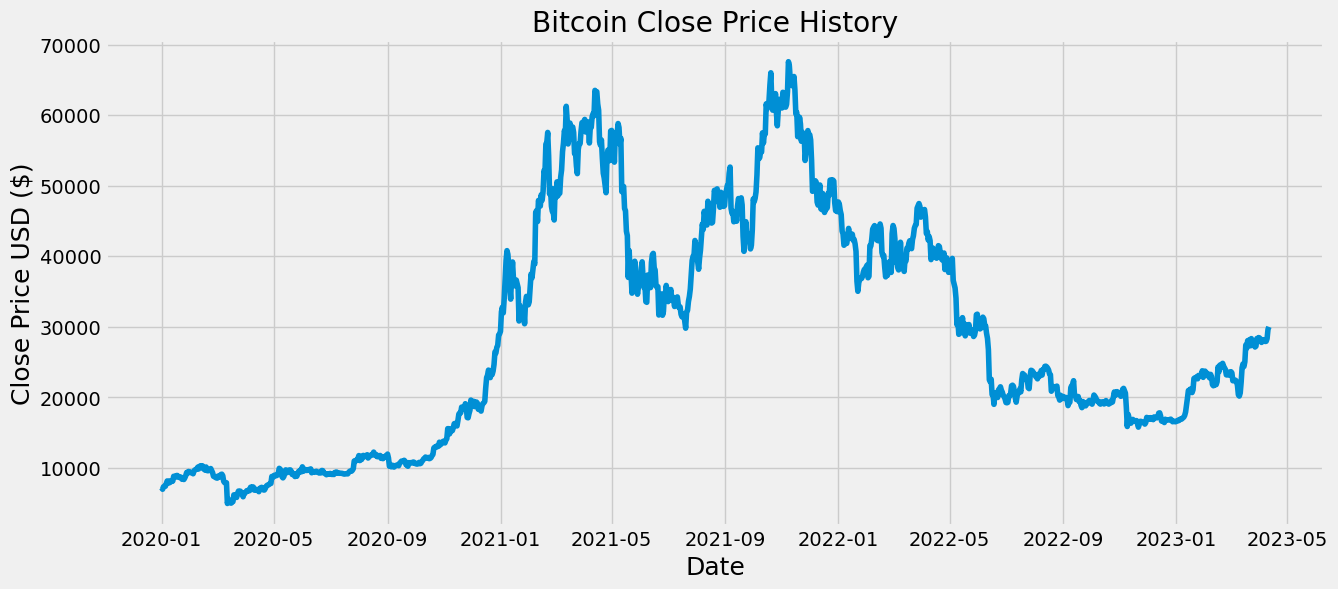

In [10]:
plt.figure(figsize=(14,6))
plt.title('Bitcoin Close Price History')
plt.plot(bitcoin_data_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [11]:
# Create a features function
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(bitcoin_data_df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [12]:
# Define the window size - number of time steps (historical data points) to be used for predicting the next time step
window_size = 30

# Set the index of the feature and target columns
feature_column = 1
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(bitcoin_data_df, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[7254.33056641 7212.15527344 7413.71533203 7427.38574219 7544.49707031
  7781.8671875  8178.21582031 8396.73828125 8082.29589844 8166.55419922
  8218.359375   8200.06347656 8197.78808594 8879.51171875 8890.1171875
  8846.4609375  8958.12207031 9012.19824219 9164.36230469 8745.59082031
  8755.70605469 8792.99414062 8687.74707031 8514.66699219 8458.453125
  8602.40136719 8977.7265625  9358.58984375 9406.43164062 9553.12597656]
 [7212.15527344 7413.71533203 7427.38574219 7544.49707031 7781.8671875
  8178.21582031 8396.73828125 8082.29589844 8166.55419922 8218.359375
  8200.06347656 8197.78808594 8879.51171875 8890.1171875  8846.4609375
  8958.12207031 9012.19824219 9164.36230469 8745.59082031 8755.70605469
  8792.99414062 8687.74707031 8514.66699219 8458.453125   8602.40136719
  8977.7265625  9358.58984375 9406.43164062 9553.12597656 9521.70605469]
 [7413.71533203 7427.38574219 7544.49707031 7781.8671875  8178.21582031
  8396.73828125 8082.29589844 8166.55419922 8218.359

In [13]:
# Splitting the data into training and testing sets
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(816, 30) (816, 1) (351, 30) (351, 1)


In [14]:
# Create a MinMaxScaler object and fit 
scaler = MinMaxScaler()
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.03029567]
  [0.02963105]
  [0.03280734]
  [0.03302277]
  [0.03486827]
  [0.03860886]
  [0.04485473]
  [0.04829831]
  [0.04334317]
  [0.04467096]
  [0.04548733]
  [0.04519901]
  [0.04516316]
  [0.0559061 ]
  [0.05607323]
  [0.05538527]
  [0.05714488]
  [0.05799704]
  [0.06039492]
  [0.05379571]
  [0.05395511]
  [0.05454271]
  [0.05288418]
  [0.05015669]
  [0.04927085]
  [0.05153926]
  [0.05745382]
  [0.06345566]
  [0.06420957]
  [0.06652126]]

 [[0.02963105]
  [0.03280734]
  [0.03302277]
  [0.03486827]
  [0.03860886]
  [0.04485473]
  [0.04829831]
  [0.04334317]
  [0.04467096]
  [0.04548733]
  [0.04519901]
  [0.04516316]
  [0.0559061 ]
  [0.05607323]
  [0.05538527]
  [0.05714488]
  [0.05799704]
  [0.06039492]
  [0.05379571]
  [0.05395511]
  [0.05454271]
  [0.05288418]
  [0.05015669]
  [0.04927085]
  [0.05153926]
  [0.05745382]
  [0.06345566]
  [0.06420957]
  [0.06652126]
  [0.06602613]]

 [[0.03280734]
  [0.03302277]
  [0.03486827]
  [0.03860886]
  [0.04485473

In [15]:
# Build the LSTM model.
model = Sequential()

# Initial model setup
# number of nn units and include a 20% dropout_fraction to prevent overfitting. 
number_units = 40
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2 - LSTM layer
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3 - LSTM layer
model.add(LSTM(units=number_units, return_sequences=False))
model.add(Dropout(dropout_fraction))

# Layer 3 - Dense layer
model.add(Dense(units=20))

# Output layer
model.add(Dense(1))

In [16]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 40)            6720      
                                                                 
 dropout (Dropout)           (None, 30, 40)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 40)            12960     
                                                                 
 dropout_1 (Dropout)         (None, 30, 40)            0         
                                                                 
 lstm_2 (LSTM)               (None, 40)                12960     
                                                                 
 dropout_2 (Dropout)         (None, 40)                0         
                                                                 
 dense (Dense)               (None, 20)                8

In [17]:
# Train the model
model.fit(X_train, y_train, epochs=50, shuffle=False, batch_size=90, verbose=1)

Epoch 1/50
10/10 [==============================] - 3s 21ms/step - loss: 0.0515
Epoch 2/50
10/10 [==============================] - 0s 20ms/step - loss: 0.0297
Epoch 3/50
10/10 [==============================] - 0s 19ms/step - loss: 0.0138
Epoch 4/50
10/10 [==============================] - 0s 21ms/step - loss: 0.0127
Epoch 5/50
10/10 [==============================] - 0s 20ms/step - loss: 0.0156
Epoch 6/50
10/10 [==============================] - 0s 20ms/step - loss: 0.0117
Epoch 7/50
10/10 [==============================] - 0s 21ms/step - loss: 0.0203
Epoch 8/50
10/10 [==============================] - 0s 21ms/step - loss: 0.0167
Epoch 9/50
10/10 [==============================] - 0s 24ms/step - loss: 0.0262
Epoch 10/50
10/10 [==============================] - 0s 21ms/step - loss: 0.0144
Epoch 11/50
10/10 [==============================] - 0s 21ms/step - loss: 0.0218
Epoch 12/50
10/10 [==============================] - 0s 21ms/step - loss: 0.0119
Epoch 13/50
10/10 [==================

In [18]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.0011246203212067485

In [19]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

11/11 [==============================] - 1s 5ms/step


In [20]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [21]:
# Create a DataFrame of Real and Predicted values
bitcoin_df = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = bitcoin_data_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
bitcoin_df.head()

,Actual,Predicted
Date,,
2022-04-26,40713.890625,40788.000000
2022-04-27,39397.917969,40692.476562
2022-04-28,40269.464844,40574.433594
2022-04-29,39887.269531,40454.308594
2022-04-30,38771.210938,40333.640625


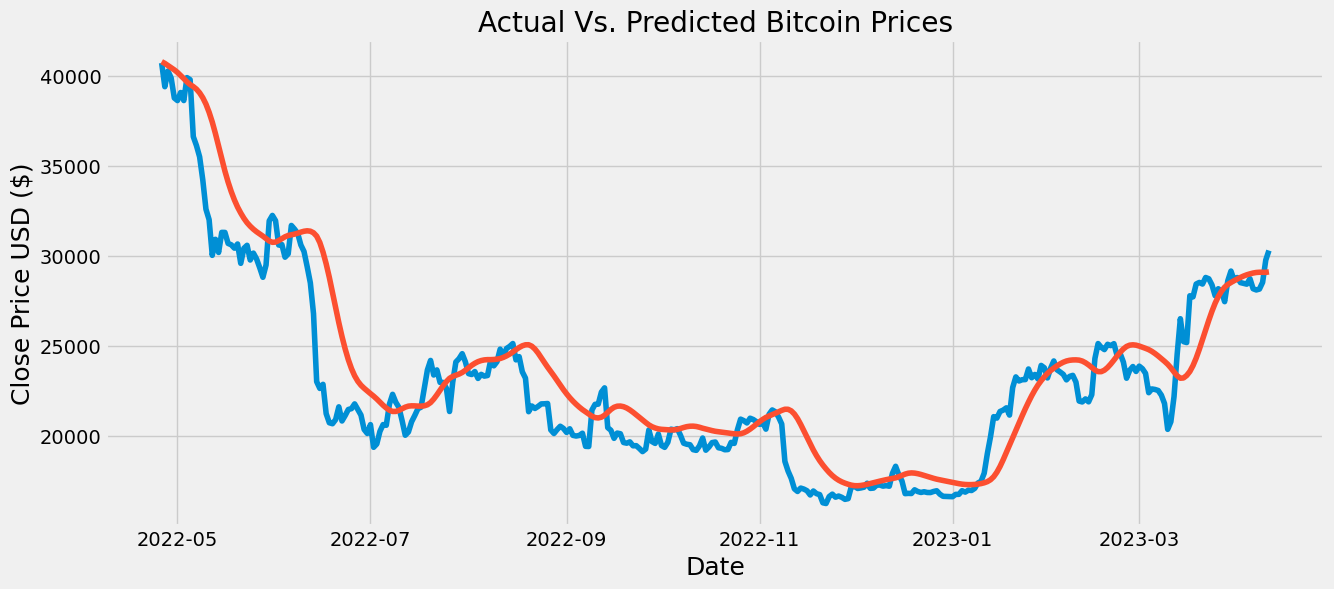

In [23]:
# Plot the real vs predicted prices as a line chart
# bitcoin_df.plot(title="Actual Vs. Predicted Bitcoin Prices")

plt.figure(figsize=(14,6))
plt.title('Actual Vs. Predicted Bitcoin Prices')
plt.plot(bitcoin_df)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()